In [107]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import glob
import sklearn
import keras
from tensorflow.python.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from keras.callbacks import ReduceLROnPlateau
from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers.experimental.preprocessing import Rescaling

In [33]:
## If you are using the data by mounting the google drive, use the following :
## from google.colab import drive
## drive.mount('/content/gdrive')
data_dir=pathlib.Path('Skin cancer ISIC The International Skin Imaging Collaboration')
##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

In [34]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path("Skin cancer ISIC The International Skin Imaging Collaboration/Test")

In [35]:
# count the total image present in train and test folder
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


In [36]:
batch_size = 32
img_height = 180
img_width = 180

In [37]:
class_names1=np.array([item.name for item in data_dir.glob('Train/*')])
class_names1

array(['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma',
       'melanoma', 'nevus', 'pigmented benign keratosis',
       'seborrheic keratosis', 'squamous cell carcinoma',
       'vascular lesion'], dtype='<U26')

In [38]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split=0.2,
    subset='training',
    image_size=(img_height,img_width),
    batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [39]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split=0.2,
    subset='validation',
    image_size=(img_height,img_width),
    batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [40]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


In [41]:
image_generator=keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
train_data_gen=image_generator.flow_from_directory(directory=data_dir_train,batch_size=batch_size,
                                                   shuffle=True,target_size=(img_height,img_width),classes=list(class_names))

Found 2239 images belonging to 9 classes.


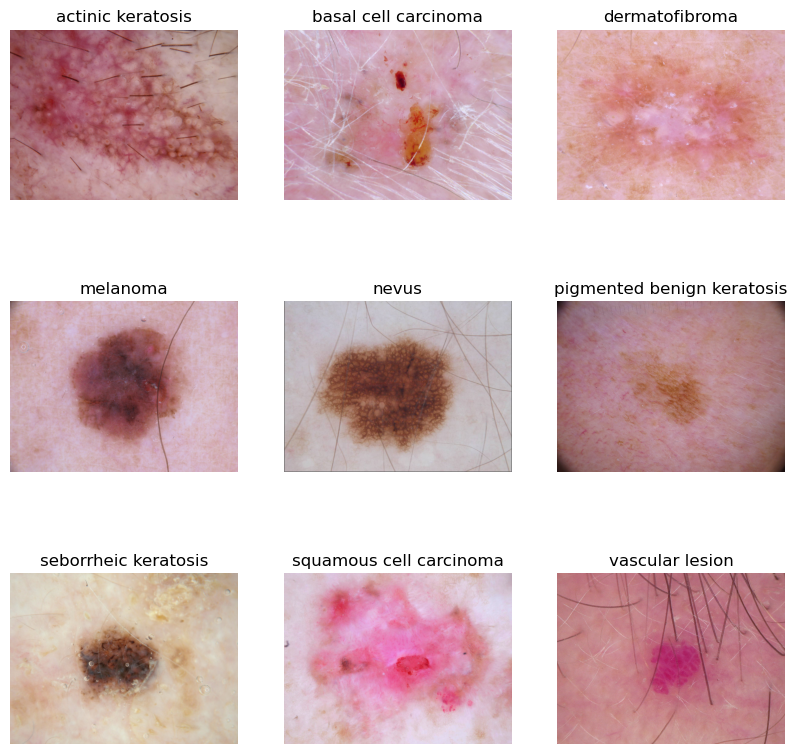

In [42]:
### your code goes here, you can use training or validation data to visualize
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.figure(figsize=(10,10))
for index,name in enumerate(class_names):
   ax=plt.subplot(3,3,index+1)
   images=list(data_dir_train.glob(name+'/*'))
   img=mpimg.imread((str(images[0])))
   plt.imshow(img)
   plt.title(name)
   plt.axis('off')

In [43]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [44]:
### Your code goes here
num_classes = 9
# creating the model
# model = Sequential([
#   layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
#   layers.Conv2D(16, 3, padding='same', activation='relu'),
#   layers.MaxPooling2D(),
#   layers.Conv2D(32, 3, padding='same', activation='relu'),
#   layers.MaxPooling2D(),
#   layers.Conv2D(64, 3, padding='same', activation='relu'),
#   layers.MaxPooling2D(),
#   layers.Flatten(),
#   layers.Dense(128, activation='softmax'),
#   layers.Dense(num_classes)
# ])
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes,activation='softmax')
])


In [45]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [46]:
# View the summary of all layers
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 45, 45, 64)       

In [47]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 27s 385ms/step - loss: 1.9285 - accuracy: 0.2941 - val_loss: 1.8518 - val_accuracy: 0.3110
Epoch 2/20
56/56 [==============================] - 22s 388ms/step - loss: 1.6074 - accuracy: 0.4275 - val_loss: 1.5559 - val_accuracy: 0.4832
Epoch 3/20
56/56 [==============================] - 22s 395ms/step - loss: 1.4129 - accuracy: 0.5050 - val_loss: 1.3911 - val_accuracy: 0.5168
Epoch 4/20
56/56 [==============================] - 27s 490ms/step - loss: 1.3647 - accuracy: 0.5223 - val_loss: 1.3591 - val_accuracy: 0.5280
Epoch 5/20
56/56 [==============================] - 22s 396ms/step - loss: 1.3164 - accuracy: 0.5329 - val_loss: 1.4784 - val_accuracy: 0.5123
Epoch 6/20
56/56 [==============================] - 22s 391ms/step - loss: 1.2237 - accuracy: 0.5692 - val_loss: 1.4634 - val_accuracy: 0.4810
Epoch 7/20
56/56 [==============================] - 23s 413ms/step - loss: 1.1359 - accuracy: 0.6010 - val_loss: 1.3132 - val_accuracy: 0.5414

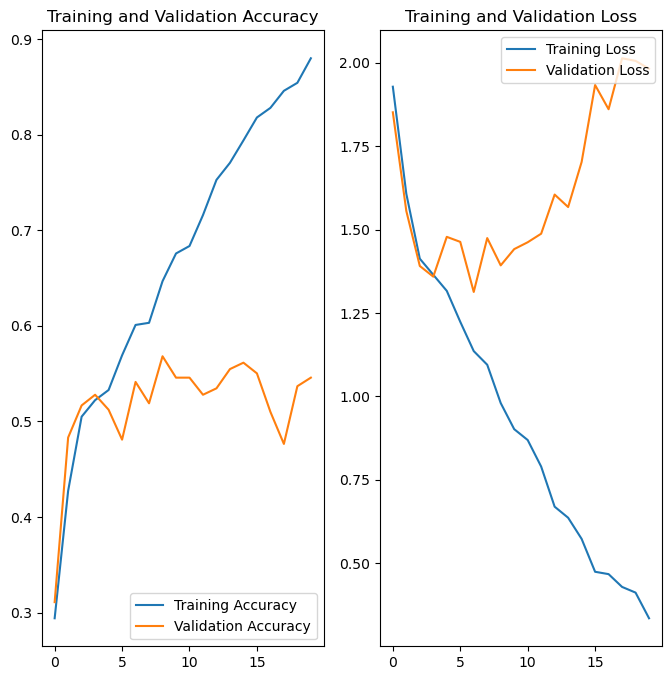

In [48]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [49]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here

#By Observing the above grapgh, i see train and validation accuracy away from each other, which is a clear sign of overfitting

In [50]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
# Data Augmentation
data_augmentation=keras.Sequential([
                                    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
                                    layers.experimental.preprocessing.RandomRotation(0.1),
                                    layers.experimental.preprocessing.RandomZoom(0.1)])

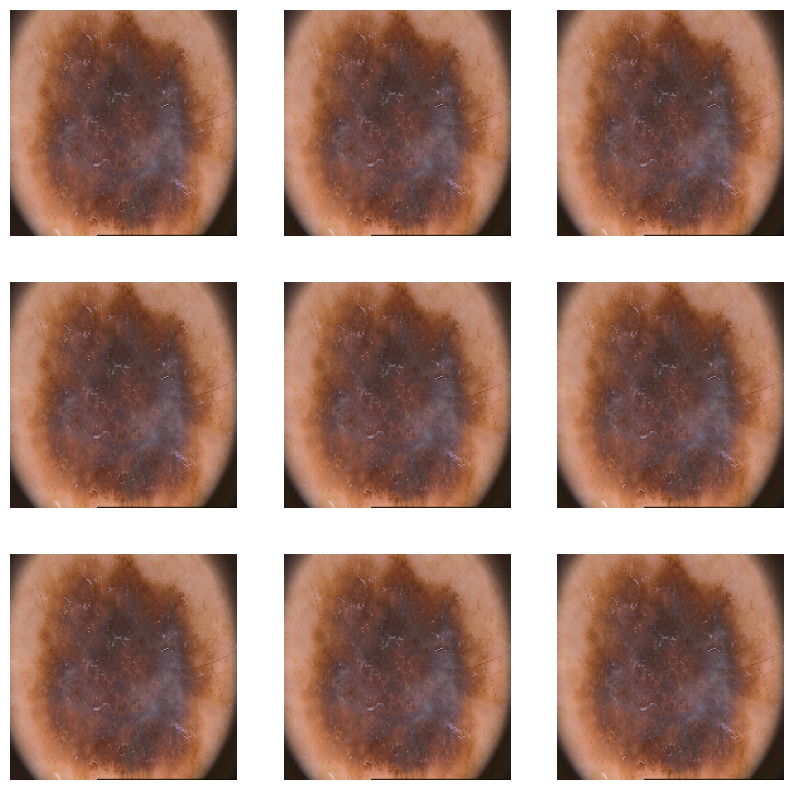

In [51]:
# visualising the augmented image
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(7):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [52]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here

model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.Dropout(0.25),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes,activation='softmax')
])

In [53]:
## Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [54]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_4 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_3 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 180, 180, 64)      1792      
                                                                 
 dropout_2 (Dropout)         (None, 180, 180, 64)      0         
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 90, 90, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 90, 90, 32)        18464     
                                                      

In [55]:
## Your code goes here, note: train your model for 20 epochs
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 113s 2s/step - loss: 1.9634 - accuracy: 0.2712 - val_loss: 1.7854 - val_accuracy: 0.3557
Epoch 2/20
56/56 [==============================] - 97s 2s/step - loss: 1.7628 - accuracy: 0.3438 - val_loss: 1.6682 - val_accuracy: 0.4273
Epoch 3/20
56/56 [==============================] - 98s 2s/step - loss: 1.6280 - accuracy: 0.4191 - val_loss: 1.6036 - val_accuracy: 0.4519
Epoch 4/20
56/56 [==============================] - 99s 2s/step - loss: 1.5485 - accuracy: 0.4598 - val_loss: 1.6028 - val_accuracy: 0.4183
Epoch 5/20
56/56 [==============================] - 98s 2s/step - loss: 1.5110 - accuracy: 0.4621 - val_loss: 1.5303 - val_accuracy: 0.4810
Epoch 6/20
56/56 [==============================] - 99s 2s/step - loss: 1.4785 - accuracy: 0.4704 - val_loss: 1.4343 - val_accuracy: 0.5123
Epoch 7/20
56/56 [==============================] - 100s 2s/step - loss: 1.3604 - accuracy: 0.5257 - val_loss: 1.3740 - val_accuracy: 0.5324
Epoch 8/20
56/56 [

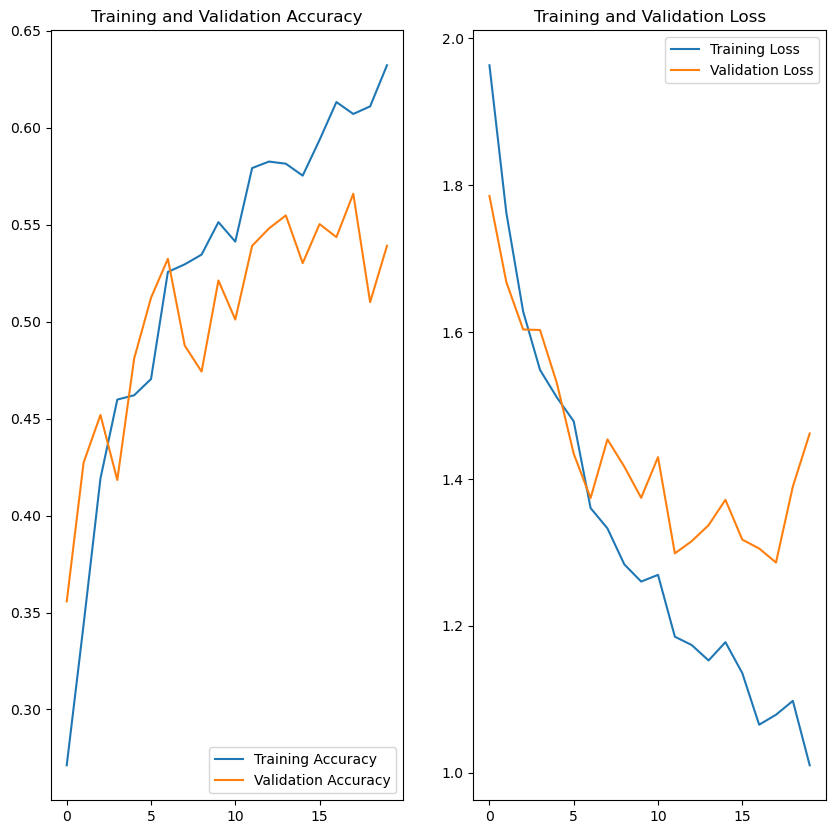

In [56]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [74]:
!pip install Augmentor

In [86]:
path_to_training_dataset="Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
# data_dir_train = pathlib.Path(root_path + '/Train')
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500)

Initialised with 114 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x14CE32D6700>: 100%|██████████| 500/500 [00:03<00:00, 133.75 Samples/s]


Initialised with 376 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x14CE1408E80>: 100%|██████████| 500/500 [00:03<00:00, 128.69 Samples/s]


Initialised with 95 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x14CD3162400>: 100%|██████████| 500/500 [00:03<00:00, 130.27 Samples/s]                  


Initialised with 438 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma\output.

Processing <PIL.Image.Image image mode=RGB size=767x576 at 0x14CE262CCA0>: 100%|██████████| 500/500 [00:24<00:00, 20.64 Samples/s]                    


Initialised with 357 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=2048x1536 at 0x14CE276BA30>: 100%|██████████| 500/500 [00:18<00:00, 27.69 Samples/s]


Initialised with 462 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x14CE18E9C40>: 100%|██████████| 500/500 [00:04<00:00, 122.18 Samples/s]                  


Initialised with 77 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x14CCF922C40>: 100%|██████████| 500/500 [00:09<00:00, 54.77 Samples/s]                  


Initialised with 181 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x14CE370A100>: 100%|██████████| 500/500 [00:04<00:00, 117.47 Samples/s]                  


Initialised with 139 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x14CE1481130>: 100%|██████████| 500/500 [00:04<00:00, 124.21 Samples/s]                  


In [87]:
# count created image total
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


In [88]:
import glob
path_list_new = [x for x in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
len(path_list_new)
print(path_list_new)

['Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_2717a661-11c4-4bcd-bdd3-9098f23c2454.jpg', 'Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_8b63992c-9b4e-4f92-9aac-b22408d55c03.jpg', 'Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025803.jpg_0e677c5e-c833-4024-8ae9-ace796c47e5c.jpg', 'Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025803.jpg_bccb1435-6435-4689-af5c-86ee7e215732.jpg', 'Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025825.jpg_3caeaba4-6962-468b-9d2d-50c47098ca7c.jpg', 'Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\act

In [89]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
print(len(lesion_list_new))
print(lesion_list_new)

4500
['actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actini

In [90]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [91]:
path_list=[x for x in glob.glob(os.path.join(data_dir_train,'*','*.jpg'))]
len(path_list)

2239

In [94]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = df2

In [95]:
new_df['Label'].value_counts()

actinic keratosis             500
basal cell carcinoma          500
dermatofibroma                500
melanoma                      500
nevus                         500
pigmented benign keratosis    500
seborrheic keratosis          500
squamous cell carcinoma       500
vascular lesion               500
Name: Label, dtype: int64

In [96]:
batch_size = 32
img_height = 180
img_width = 180

In [98]:
#data_dir_train="/content/gdrive/MyDrive/CNN/Skin_Data_Store/Train"
data_dir_train = ("Skin cancer ISIC The International Skin Imaging Collaboration/Train")
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.1,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 15739 files belonging to 10 classes.
Using 14166 files for training.


In [99]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.1,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 15739 files belonging to 10 classes.
Using 1573 files for validation.


In [105]:
input_shape = (180,180,3)
model = Sequential()

# Increse the model size by adding another 32 layer
model.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(180, 180, 3)))

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=input_shape))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'))

# Max Pool size of 2*2
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(BatchNormalization())
# Adding Dropout Layer
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding = 'Same'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1, activation='softmax'))

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_24 (Rescaling)    (None, 180, 180, 3)       0         
                                                                 
 module_wrapper_3 (ModuleWra  (None, 180, 180, 32)     896       
 pper)                                                           
                                                                 
 module_wrapper_4 (ModuleWra  (None, 180, 180, 32)     9248      
 pper)                                                           
                                                                 
 module_wrapper_5 (ModuleWra  (None, 90, 90, 32)       0         
 pper)                                                           
                                                                 
 batch_normalization (BatchN  (None, 90, 90, 32)       128       
 ormalization)                                        

In [108]:
optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

model.compile(loss='categorical_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])

In [ ]:
epochs = 50

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
    patience=3, 
    verbose=1, 
    factor=0.5, 
    min_lr=0.00001)

batch_size = 10
history = model.fit(train_ds,
  epochs = epochs, verbose = 1, validation_data=val_ds , callbacks=[learning_rate_reduction])

Epoch 1/50
443/443 [==============================] - 1156s 3s/step - loss: 0.0000e+00 - accuracy: 0.0562 - val_loss: 0.0000e+00 - val_accuracy: 0.0509 - lr: 0.0010
Epoch 2/50
443/443 [==============================] - 1134s 3s/step - loss: 0.0000e+00 - accuracy: 0.0562 - val_loss: 0.0000e+00 - val_accuracy: 0.0509 - lr: 0.0010
Epoch 3/50
443/443 [==============================] - 1141s 3s/step - loss: 0.0000e+00 - accuracy: 0.0562 - val_loss: 0.0000e+00 - val_accuracy: 0.0509 - lr: 0.0010
Epoch 4/50
443/443 [==============================] - ETA: 0s - loss: 0.0000e+00 - accuracy: 0.0562
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
443/443 [==============================] - 1136s 3s/step - loss: 0.0000e+00 - accuracy: 0.0562 - val_loss: 0.0000e+00 - val_accuracy: 0.0509 - lr: 0.0010
Epoch 5/50
443/443 [==============================] - 1179s 3s/step - loss: 0.0000e+00 - accuracy: 0.0562 - val_loss: 0.0000e+00 - val_accuracy: 0.0509 - lr: 5.0000e-04
Epoch 